# Introduction to Data Science - Project 2

***
### Group 3

1. Jerome Francis Cadorna
2. John Patrick Cervantes
3. Laurence Kobe Navarro
4. Darrel Tristan Virtusio

***
### COVID-19 Global Dataset hyperlinks: 

<a href="https://datahub.io/core/covid-19#data">Main website for the COVID-19 Global Dataset</a>

***

### Content of the project

- The program displays the confirmed cases, recoveries, mortalities, and active cases of Peru and South Africa from June 2020 to August 2020 only

- The program also displays the 7-day moving average for confirmed cases, recoveries, mortalities, and active cases

- Each figure has the same interactivity. When the legend is clicked, it will display the highest and lowest value of the  cases or the 7-day moving average in the title
***

## Main Program

***
### Importing libraries

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the dataset using pandas

In [2]:
data = pd.read_csv('countries-aggregated_csv.csv')

### Extracting the data of Peru and South Africa from the global dataset

In [3]:
peru_data = data[data.Country == "Peru"]

sa_data = data[data.Country == "South Africa"]

In [4]:
peru = peru_data.iloc[131:223]

sa = sa_data.iloc[131:223]

### Displaying some data of Peru and South Africa

In [5]:
peru.head()

,Date,Country,Confirmed,Recovered,Deaths
30415,2020-06-01,Peru,170039,68507,4634
30416,2020-06-02,Peru,178165,69257,4767
30417,2020-06-03,Peru,178914,72319,4894
30418,2020-06-04,Peru,183198,76228,5031
30419,2020-06-05,Peru,187400,79214,5162


In [6]:
sa.head()

,Date,Country,Confirmed,Recovered,Deaths
35387,2020-06-01,South Africa,34357,17291,705
35388,2020-06-02,South Africa,35812,18313,755
35389,2020-06-03,South Africa,37525,19682,792
35390,2020-06-04,South Africa,40792,21311,848
35391,2020-06-05,South Africa,43434,23088,908


### Assigning variables

In [7]:
peru_confirmed = peru.Confirmed
peru_recovered = peru.Recovered
peru_death = peru.Deaths

sa_confirmed = sa.Confirmed
sa_recovered = sa.Recovered
sa_death = sa.Deaths

### Creating the data of active case of Peru

In [8]:
confirmed_arr_p = []
recovered_arr_p = []
deaths_arr_p = []

for data in peru_confirmed:
    confirmed_arr_p.append(data)

for data in peru_recovered:
    recovered_arr_p.append(data)
    
for data in peru_death:
    deaths_arr_p.append(data)    

arr_p = np.array([[confirmed_arr_p, recovered_arr_p, deaths_arr_p]])

peru_active = []

for x in range(92):
    val = np.subtract(arr_p[0,0][x], arr_p[0, 1][x]) - arr_p[0, 2][x]
    peru_active.append(val)

### Creating the data of active case of South Africa

In [9]:
confirmed_arr_s = []
recovered_arr_s = []
deaths_arr_s = []

for data in sa_confirmed:
    confirmed_arr_s.append(data)

for data in sa_recovered:
    recovered_arr_s.append(data)
    
for data in sa_death:
    deaths_arr_s.append(data)    

arr_s = np.array([[confirmed_arr_s, recovered_arr_s, deaths_arr_s]])

sa_active = []

for x in range(92):
    val = np.subtract(arr_s[0,0][x], arr_s[0, 1][x]) - arr_s[0, 2][x]
    sa_active.append(val)

### Computing for 7-Day Moving Average of Peru

In [10]:
pd_confirmed = peru['Confirmed'].tolist()
pd_death = peru['Deaths'].tolist()
pd_recovered = peru['Recovered'].tolist()

def movingAverage(value):
    weights = np.repeat(1.0, 7)/7
    smas = np.convolve(value, weights, 'valid')
    return smas

smas_confirmed_p = movingAverage(pd_confirmed)
smas_death_p = movingAverage(pd_death)
smas_recovered_p = movingAverage(pd_recovered)
smas_active_p = movingAverage(peru_active)

### Computing for 7-Day Moving Average of South Africa

In [11]:
sd_confirmed = sa['Confirmed'].tolist()
sd_death = sa['Deaths'].tolist()
sd_recovered = sa['Recovered'].tolist()

def movingAverage(value):
    weights = np.repeat(1.0, 7)/7
    smas = np.convolve(value, weights, 'valid')
    return smas

smas_confirmed_s = movingAverage(sd_confirmed)
smas_death_s = movingAverage(sd_death)
smas_recovered_s = movingAverage(sd_recovered)
smas_active_s = movingAverage(sa_active)

### Setting the font size

In [12]:
AXIS = 10
LABEL = 16

plt.rc('xtick', labelsize=AXIS)
plt.rc('ytick', labelsize=AXIS)
plt.rc('axes', labelsize=LABEL)

### Arranging the dates

In [13]:
dates = []

for i in range(92):
    x = peru.iloc[i,0]
    dates.append(x)

final_dates_7day = []

for i in range(86):
    y = dates[i+6]
    final_dates_7day.append(y) 

# Peru

### Plotting the confirmed cases of Peru with 7-Day Moving Average

<IPython.core.display.Javascript object>


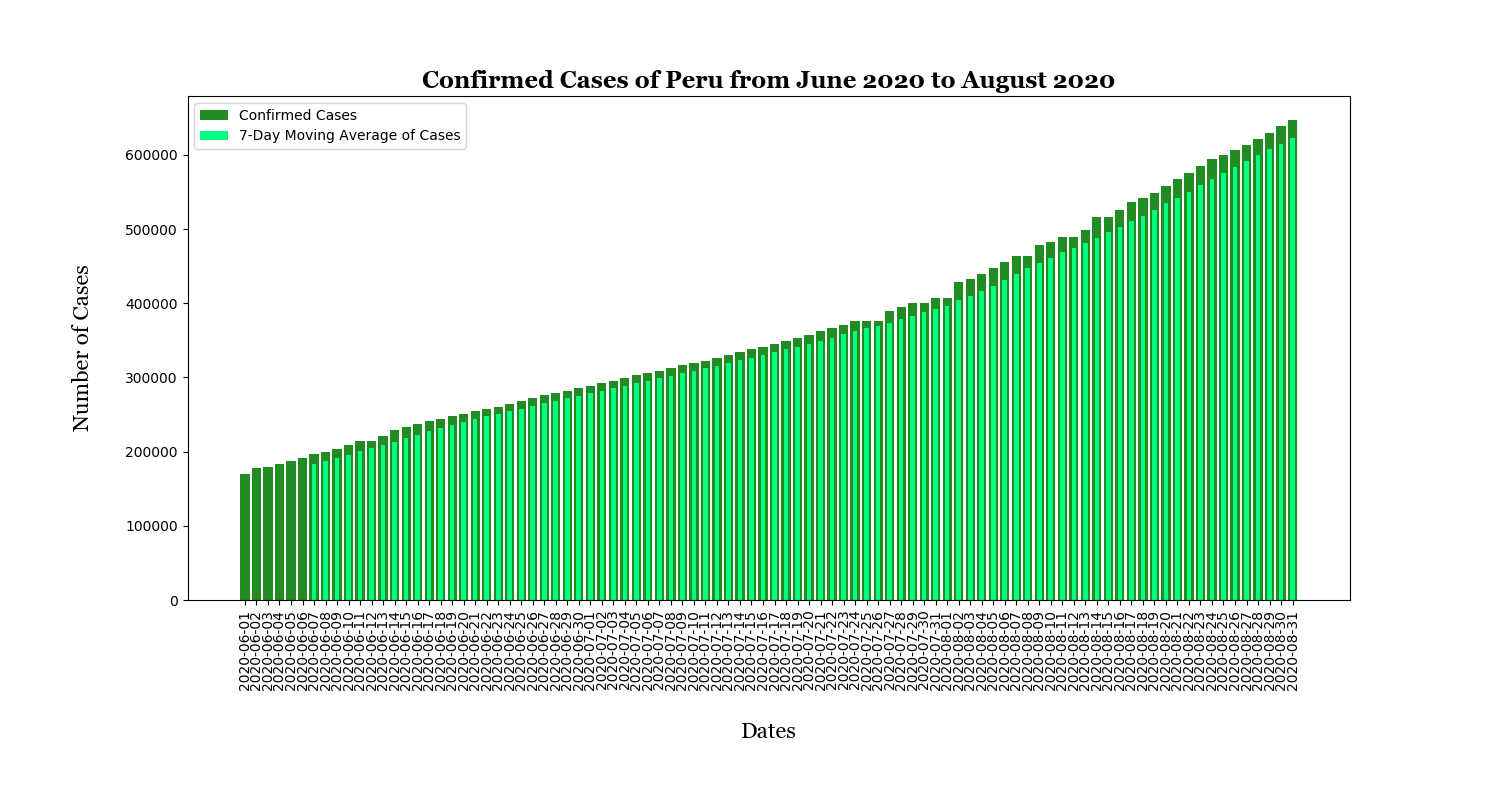

7

In [14]:
fig = plt.figure(figsize=(15,8))

plt.subplot(1,1,1)

for i in range(92):
    for item in plt.gca().xaxis.get_ticklabels():
        item.set_rotation(90)
        
    plt.bar(dates[i], peru_confirmed.iloc[i], width = 0.80, color='forestgreen')
    
for i in range(86):
    plt.bar(final_dates_7day[i], smas_confirmed_p[i], width = 0.40, color='springgreen')

plt.bar(dates[0], peru_confirmed.iloc[0], width = 0.80, color='forestgreen', label ='Confirmed Cases')
plt.bar(final_dates_7day[0], smas_confirmed_p[0], width = 0.40, color='springgreen', label = '7-Day Moving Average of Cases')
ax = plt.gca()
ax.set_xlabel('\nDates', fontdict={'fontname': 'Georgia'})
ax.set_ylabel('Number of Cases\n', fontdict={'fontname': 'Georgia'})
ax.set_title("Confirmed Cases of Peru from June 2020 to August 2020", fontdict={'fontname': 'Georgia', 'fontsize': 17, 'fontweight': 'bold'})
plt.legend()
plt.subplots_adjust(bottom=0.25)
plt.show()

def onclick(event):  
    plt.cla()
    for i in range(92):
        for item in plt.gca().xaxis.get_ticklabels():
            item.set_rotation(90)
        
        plt.bar(dates[i], peru_confirmed.iloc[i], width = 0.80, color='forestgreen')
    
    for i in range(86):
        plt.bar(final_dates_7day[i], smas_confirmed_p[i], width = 0.40, color='springgreen')
    
    plt.bar(dates[0], peru_confirmed.iloc[0], width = 0.80, color='forestgreen', label ='Confirmed Cases')
    plt.bar(final_dates_7day[0], smas_confirmed_p[0], width = 0.40, color='springgreen', label = '7-Day Moving Average of Cases')
    ax = plt.gca()
    ax.set_xlabel('\nDates', fontdict={'fontname': 'Georgia'})
    ax.set_ylabel('Number of Cases\n', fontdict={'fontname': 'Georgia'})
    ax.set_title("Confirmed Cases of Peru from June 2020 to August 2020", fontdict={'fontname': 'Georgia', 'fontsize': 17, 'fontweight': 'bold'})
    plt.legend()
    plt.subplots_adjust(bottom=0.25)
    plt.show()
    
    if event.xdata >= -5 and event.xdata <= 10 and event.ydata >= 644000:
        plt.gca().set_title('Confirmed Cases\nLowest Value: {}\nHighest Value: {}'.format(peru_confirmed.min(), peru_confirmed.max()), fontdict={'fontname': 'Georgia', 'fontsize': 12})
    
    if event.xdata >= -5 and event.xdata <= 10 and event.ydata < 644000 and event.ydata >= 615000:
        plt.gca().set_title('7-Day Moving Average\nLowest Value: {:.2f}\nHighest Value: {:.2f}'.format(smas_confirmed_p.min(), smas_confirmed_p.max()), fontdict={'fontname': 'Georgia', 'fontsize': 12})

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

### Plotting the recovered cases of Peru with 7-Day Moving Average

<IPython.core.display.Javascript object>


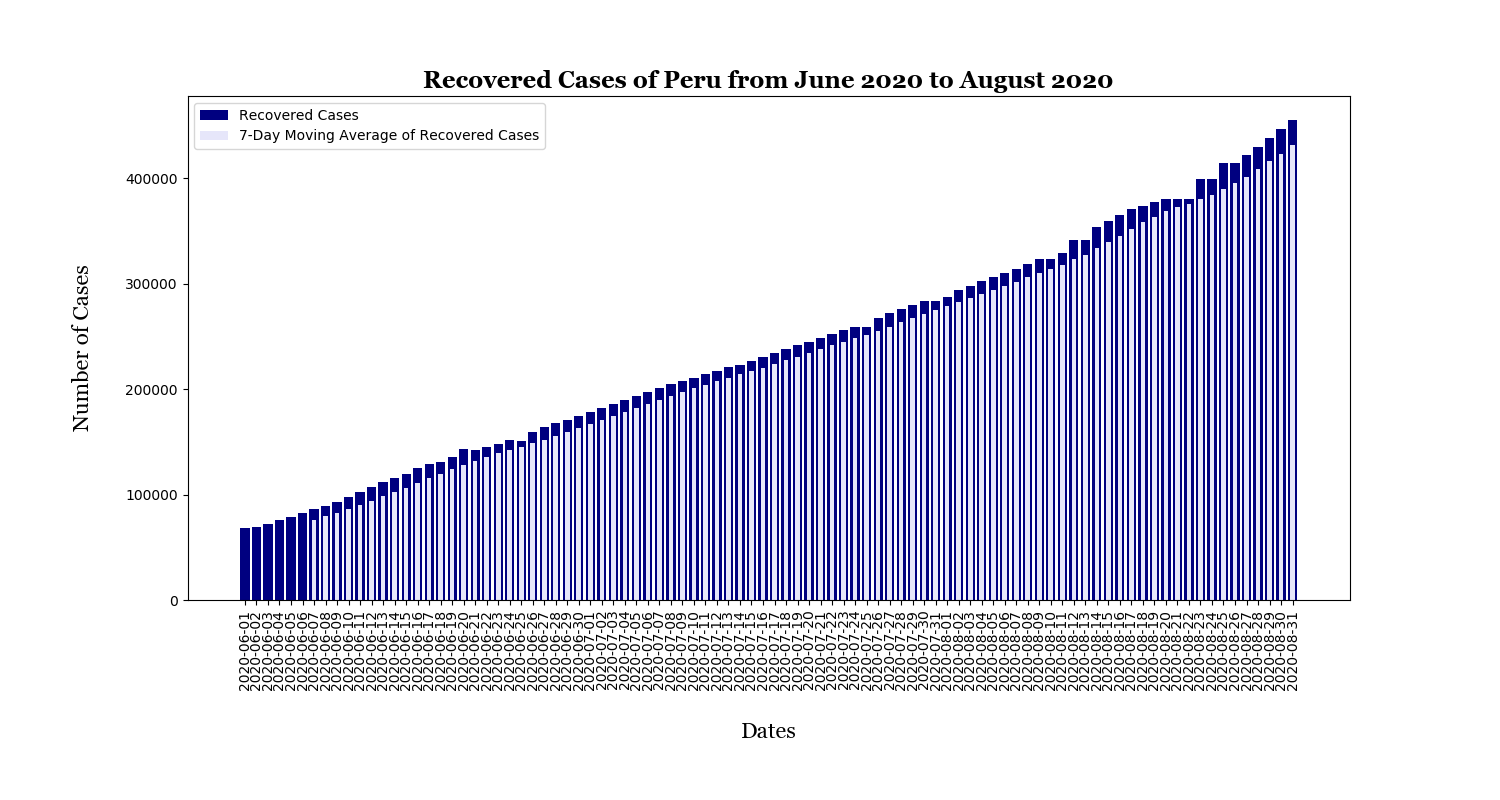

7

In [15]:
fig = plt.figure(figsize=(15,8))

plt.subplot(1,1,1)

for i in range(92):
    for item in plt.gca().xaxis.get_ticklabels():
        item.set_rotation(90)
        
    plt.bar(dates[i], peru_recovered.iloc[i], width = 0.80, color='navy')
    
for i in range(86):
    plt.bar(final_dates_7day[i], smas_recovered_p[i], width = 0.40, color='lavender')

plt.bar(dates[0], peru_recovered.iloc[0], width = 0.80, color='navy', label ='Recovered Cases')
plt.bar(final_dates_7day[0], smas_recovered_p[0], width = 0.40, color='lavender', label = '7-Day Moving Average of Recovered Cases')
ax = plt.gca()
ax.set_xlabel('\nDates', fontdict={'fontname': 'Georgia'})
ax.set_ylabel('Number of Cases\n', fontdict={'fontname': 'Georgia'})
ax.set_title("Recovered Cases of Peru from June 2020 to August 2020", fontdict={'fontname': 'Georgia', 'fontsize': 17, 'fontweight': 'bold'})
plt.legend()
plt.subplots_adjust(bottom=0.25)
plt.show()

def onclick(event):  
    plt.cla()
    for i in range(92):
        for item in plt.gca().xaxis.get_ticklabels():
            item.set_rotation(90)
        
        plt.bar(dates[i], peru_recovered.iloc[i], width = 0.80, color='navy')
    
    for i in range(86):
        plt.bar(final_dates_7day[i], smas_recovered_p[i], width = 0.40, color='lavender')
    
    plt.bar(dates[0], peru_recovered.iloc[0], width = 0.80, color='navy', label ='Recovered Cases')
    plt.bar(final_dates_7day[0], smas_recovered_p[0], width = 0.40, color='lavender', label = '7-Day Moving Average of Recovered Cases')
    ax = plt.gca()
    ax.set_xlabel('\nDates', fontdict={'fontname': 'Georgia'})
    ax.set_ylabel('Number of Cases\n', fontdict={'fontname': 'Georgia'})
    ax.set_title("Recovered Cases of Peru from June 2020 to August 2020", fontdict={'fontname': 'Georgia', 'fontsize': 17, 'fontweight': 'bold'})
    plt.legend()
    plt.subplots_adjust(bottom=0.25)
    plt.show()
    
    if event.xdata >= -5 and event.xdata <= 10 and event.ydata >= 454000:
        plt.gca().set_title('Recovered Cases\nLowest Value: {}\nHighest Value: {}'.format(peru_recovered.min(), peru_recovered.max()), fontdict={'fontname': 'Georgia', 'fontsize': 12})
    
    if event.xdata >= -5 and event.xdata <= 10 and event.ydata < 454000 and event.ydata >= 432000:
        plt.gca().set_title('7-Day Moving Average\nLowest Value: {:.2f}\nHighest Value: {:.2f}'.format(smas_recovered_p.min(), smas_recovered_p.max()), fontdict={'fontname': 'Georgia', 'fontsize': 12})

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

### Plotting the death cases of Peru with 7-Day Moving Average

<IPython.core.display.Javascript object>


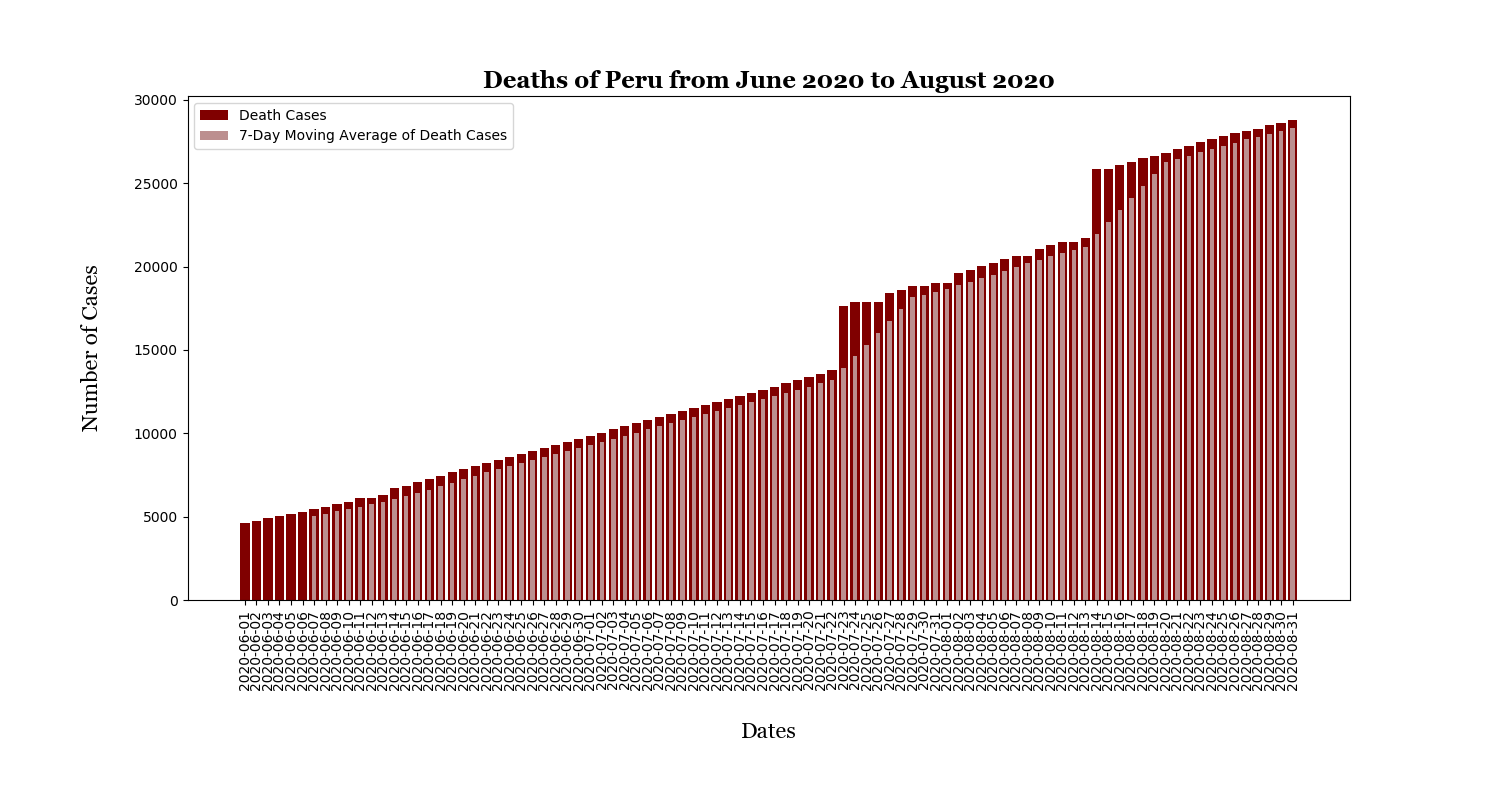

7

In [16]:
fig = plt.figure(figsize=(15,8))

plt.subplot(1,1,1)

for i in range(92):
    for item in plt.gca().xaxis.get_ticklabels():
        item.set_rotation(90)
        
    plt.bar(dates[i], peru_death.iloc[i], width = 0.80, color='maroon')
    
for i in range(86):
    plt.bar(final_dates_7day[i], smas_death_p[i], width = 0.40, color='rosybrown')

plt.bar(dates[0], peru_death.iloc[0], width = 0.80, color='maroon', label ='Death Cases')
plt.bar(final_dates_7day[0], smas_death_p[0], width = 0.40, color='rosybrown', label = '7-Day Moving Average of Death Cases')
ax = plt.gca()
ax.set_xlabel('\nDates', fontdict={'fontname': 'Georgia'})
ax.set_ylabel('Number of Cases\n', fontdict={'fontname': 'Georgia'})
ax.set_title("Deaths of Peru from June 2020 to August 2020", fontdict={'fontname': 'Georgia', 'fontsize': 17, 'fontweight': 'bold'})
plt.legend()
plt.subplots_adjust(bottom=0.25)
plt.show()

def onclick(event):  
    plt.cla()
    for i in range(92):
        for item in plt.gca().xaxis.get_ticklabels():
            item.set_rotation(90)
        
        plt.bar(dates[i], peru_death.iloc[i], width = 0.80, color='maroon')
    
    for i in range(86):
        plt.bar(final_dates_7day[i], smas_death_p[i], width = 0.40, color='rosybrown')
    
    plt.bar(dates[0], peru_death.iloc[0], width = 0.80, color='maroon', label ='Death Cases')
    plt.bar(final_dates_7day[0], smas_death_p[0], width = 0.40, color='rosybrown', label = '7-Day Moving Average of Death Cases')
    ax = plt.gca()
    ax.set_xlabel('\nDates', fontdict={'fontname': 'Georgia'})
    ax.set_ylabel('Number of Cases\n', fontdict={'fontname': 'Georgia'})
    ax.set_title("Death Cases of Peru from June 2020 to August 2020", fontdict={'fontname': 'Georgia', 'fontsize': 17, 'fontweight': 'bold'})
    plt.legend()
    plt.subplots_adjust(bottom=0.25)
    plt.show()
    
    if event.xdata >= -5 and event.xdata <= 10 and event.ydata >= 29000:
        plt.gca().set_title('Death Cases\nLowest Value: {}\nHighest Value: {}'.format(peru_death.min(), peru_death.max()), fontdict={'fontname': 'Georgia', 'fontsize': 12})
    
    if event.xdata >= -5 and event.xdata <= 10 and event.ydata < 29000 and event.ydata >= 27000:
        plt.gca().set_title('7-Day Moving Average\nLowest Value: {:.2f}\nHighest Value: {:.2f}'.format(smas_death_p.min(), smas_death_p.max()), fontdict={'fontname': 'Georgia', 'fontsize': 12})
    
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

### Plotting the active cases of Peru with 7-Day Moving Average

<IPython.core.display.Javascript object>


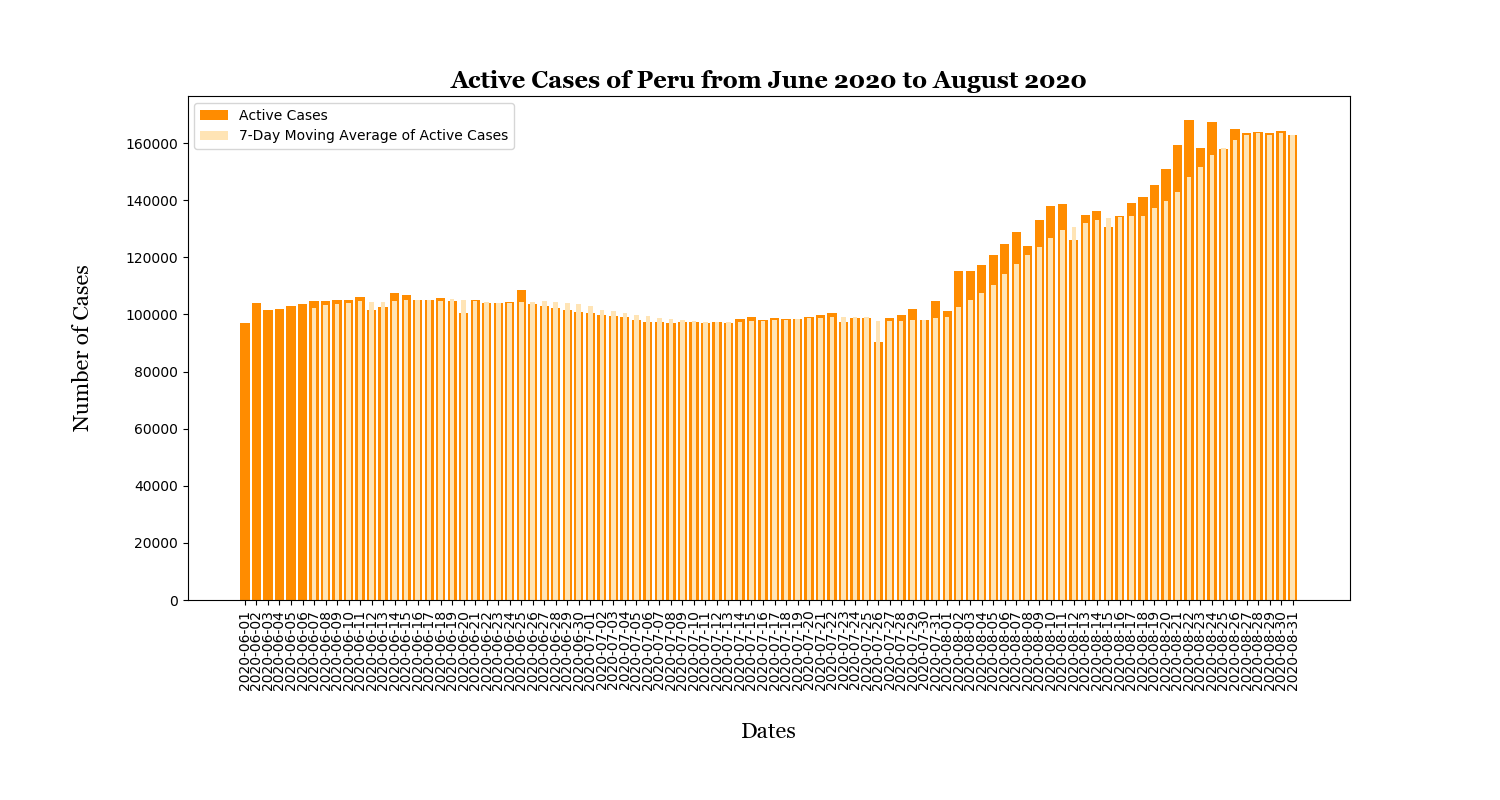

7

In [17]:
fig = plt.figure(figsize=(15,8))

plt.subplot(1,1,1)

for i in range(92):
    for item in plt.gca().xaxis.get_ticklabels():
        item.set_rotation(90)
        
    plt.bar(dates[i], peru_active[i], width = 0.80, color='darkorange')
    
for i in range(86):
    plt.bar(final_dates_7day[i], smas_active_p[i], width = 0.40, color='moccasin')

plt.bar(dates[0], peru_active[0], width = 0.80, color='darkorange', label ='Active Cases')
plt.bar(final_dates_7day[0], smas_active_p[0], width = 0.40, color='moccasin', label = '7-Day Moving Average of Active Cases')
ax = plt.gca()
ax.set_xlabel('\nDates', fontdict={'fontname': 'Georgia'})
ax.set_ylabel('Number of Cases\n', fontdict={'fontname': 'Georgia'})
ax.set_title("Active Cases of Peru from June 2020 to August 2020", fontdict={'fontname': 'Georgia', 'fontsize': 17, 'fontweight': 'bold'})
plt.legend()
plt.subplots_adjust(bottom=0.25)
plt.show()

def onclick(event):  
    plt.cla()
    for i in range(92):
        for item in plt.gca().xaxis.get_ticklabels():
            item.set_rotation(90)
        
        plt.bar(dates[i], peru_active[i], width = 0.80, color='darkorange')
    
    for i in range(86):
        plt.bar(final_dates_7day[i], smas_active_p[i], width = 0.40, color='moccasin')

    plt.bar(dates[0], peru_active[0], width = 0.80, color='darkorange', label ='Active Cases')
    plt.bar(final_dates_7day[0], smas_active_p[0], width = 0.40, color='moccasin', label = '7-Day Moving Average of Active Cases')
    ax = plt.gca()
    ax.set_xlabel('\nDates', fontdict={'fontname': 'Georgia'})
    ax.set_ylabel('Number of Cases\n', fontdict={'fontname': 'Georgia'})
    ax.set_title("Active Cases of Peru from June 2020 to August 2020", fontdict={'fontname': 'Georgia', 'fontsize': 17, 'fontweight': 'bold'})
    plt.legend()
    plt.subplots_adjust(bottom=0.25)
    plt.show()
    
    if event.xdata >= -5 and event.xdata <= 10 and event.ydata >= 168000:
        plt.gca().set_title('Active Cases\nLowest Value: {}\nHighest Value: {}'.format(min(peru_active), max(peru_active)), fontdict={'fontname': 'Georgia', 'fontsize': 12})
    
    if event.xdata >= -5 and event.xdata <= 10 and event.ydata < 168000 and event.ydata >= 160000:
        plt.gca().set_title('7-Day Moving Average\nLowest Value: {:.2f}\nHighest Value: {:.2f}'.format(min(smas_active_p), max(smas_active_p)), fontdict={'fontname': 'Georgia', 'fontsize': 12})
    
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

# South Africa

### Plotting the confirmed cases of South Africa with 7-Day Moving Average

<IPython.core.display.Javascript object>


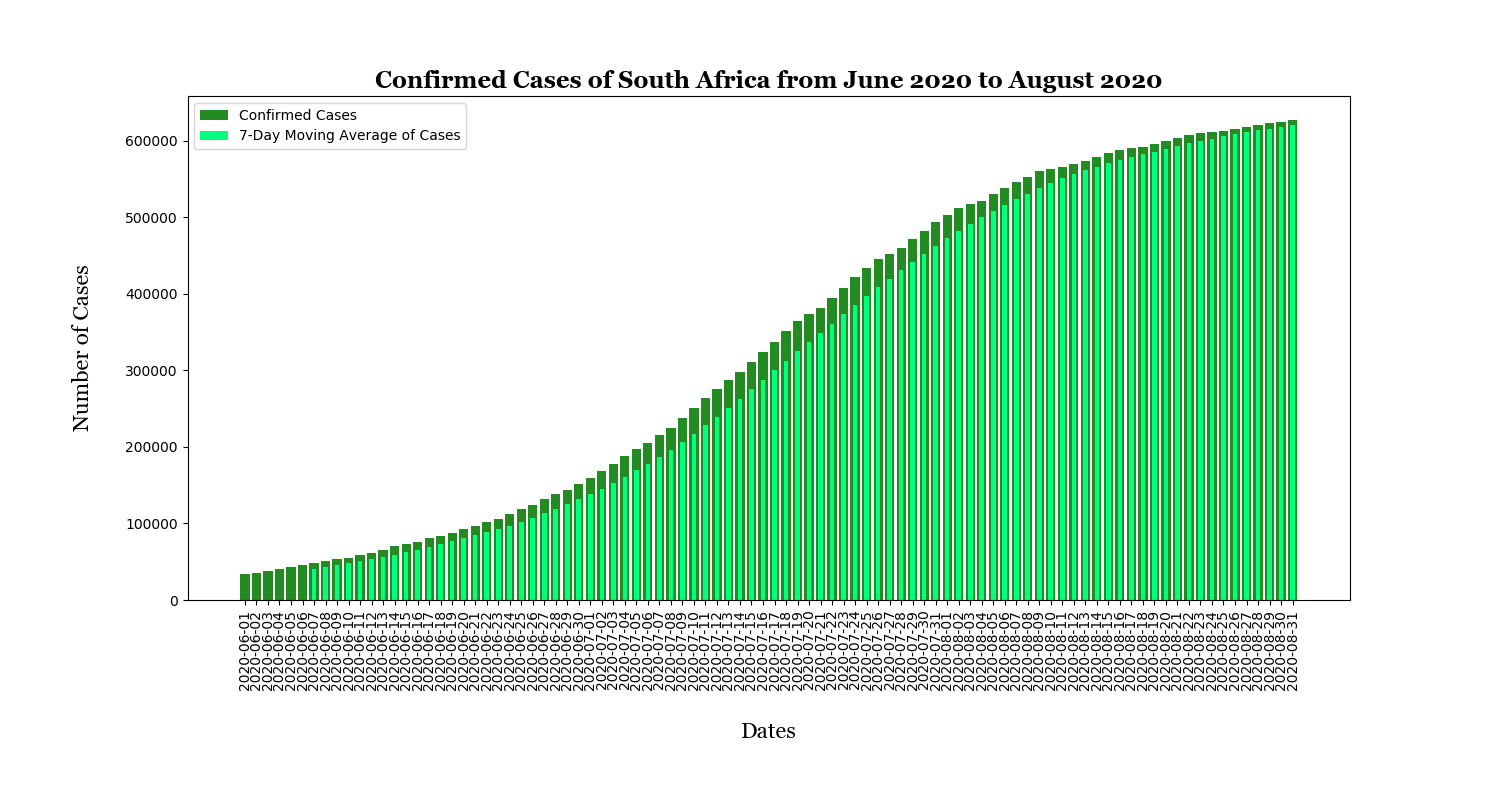

In [18]:
fig = plt.figure(figsize=(15,8))

plt.subplot(1,1,1)

for i in range(92):
    for item in plt.gca().xaxis.get_ticklabels():
        item.set_rotation(90)
        
    plt.bar(dates[i], sa_confirmed.iloc[i], width = 0.80, color='forestgreen')
    
for i in range(86):
    plt.bar(final_dates_7day[i], smas_confirmed_s[i], width = 0.40, color='springgreen')

plt.bar(dates[0], sa_confirmed.iloc[0], width = 0.80, color='forestgreen', label ='Confirmed Cases')
plt.bar(final_dates_7day[0], smas_confirmed_s[0], width = 0.40, color='springgreen', label = '7-Day Moving Average of Cases')
ax = plt.gca()
ax.set_xlabel('\nDates', fontdict={'fontname': 'Georgia'})
ax.set_ylabel('Number of Cases\n', fontdict={'fontname': 'Georgia'})
ax.set_title("Confirmed Cases of South Africa from June 2020 to August 2020", fontdict={'fontname': 'Georgia', 'fontsize': 17, 'fontweight': 'bold'})
plt.legend()
plt.subplots_adjust(bottom=0.25)
plt.show()
    
def onclick(event):  
    plt.cla()
    for i in range(92):
        for item in plt.gca().xaxis.get_ticklabels():
            item.set_rotation(90)
        
        plt.bar(dates[i], sa_confirmed.iloc[i], width = 0.80, color='forestgreen')
    
    for i in range(86):
        plt.bar(final_dates_7day[i], smas_confirmed_s[i], width = 0.40, color='springgreen')
    
    plt.bar(dates[0], sa_confirmed.iloc[0], width = 0.80, color='forestgreen', label ='Confirmed Cases')
    plt.bar(final_dates_7day[0], smas_confirmed_s[0], width = 0.40, color='springgreen', label = '7-Day Moving Average of Cases')
    ax = plt.gca()
    ax.set_xlabel('\nDates', fontdict={'fontname': 'Georgia'})
    ax.set_ylabel('Number of Cases\n', fontdict={'fontname': 'Georgia'})
    ax.set_title("Confirmed Cases of South Africa from June 2020 to August 2020", fontdict={'fontname': 'Georgia', 'fontsize': 17, 'fontweight': 'bold'})
    plt.legend()
    plt.subplots_adjust(bottom=0.25)
    plt.show()
    
    if event.xdata >= -5 and event.xdata <= 10 and event.ydata >= 622000:
        plt.gca().set_title('Confirmed Cases\nLowest Value: {:.2f}\nHighest Value: {:.2f}'.format(sa_confirmed.min(), sa_confirmed.max()), fontdict={'fontname': 'Georgia', 'fontsize': 12})
    
    if event.xdata >= -4 and event.xdata <= 4 and event.ydata < 622000 and event.ydata >= 597000:
        plt.gca().set_title('7-Day Moving Average\nLowest Value: {:.2f}\nHighest Value: {:.2f}'.format(smas_confirmed_s.min(), smas_confirmed_s.max()), fontdict={'fontname': 'Georgia', 'fontsize': 12})
       
plt.gcf().canvas.mpl_connect('button_press_event', onclick)
plt.savefig('test.png', bbox_inches='tight')

### Plotting the recovered cases of South Africa with 7-Day Moving Average

<IPython.core.display.Javascript object>


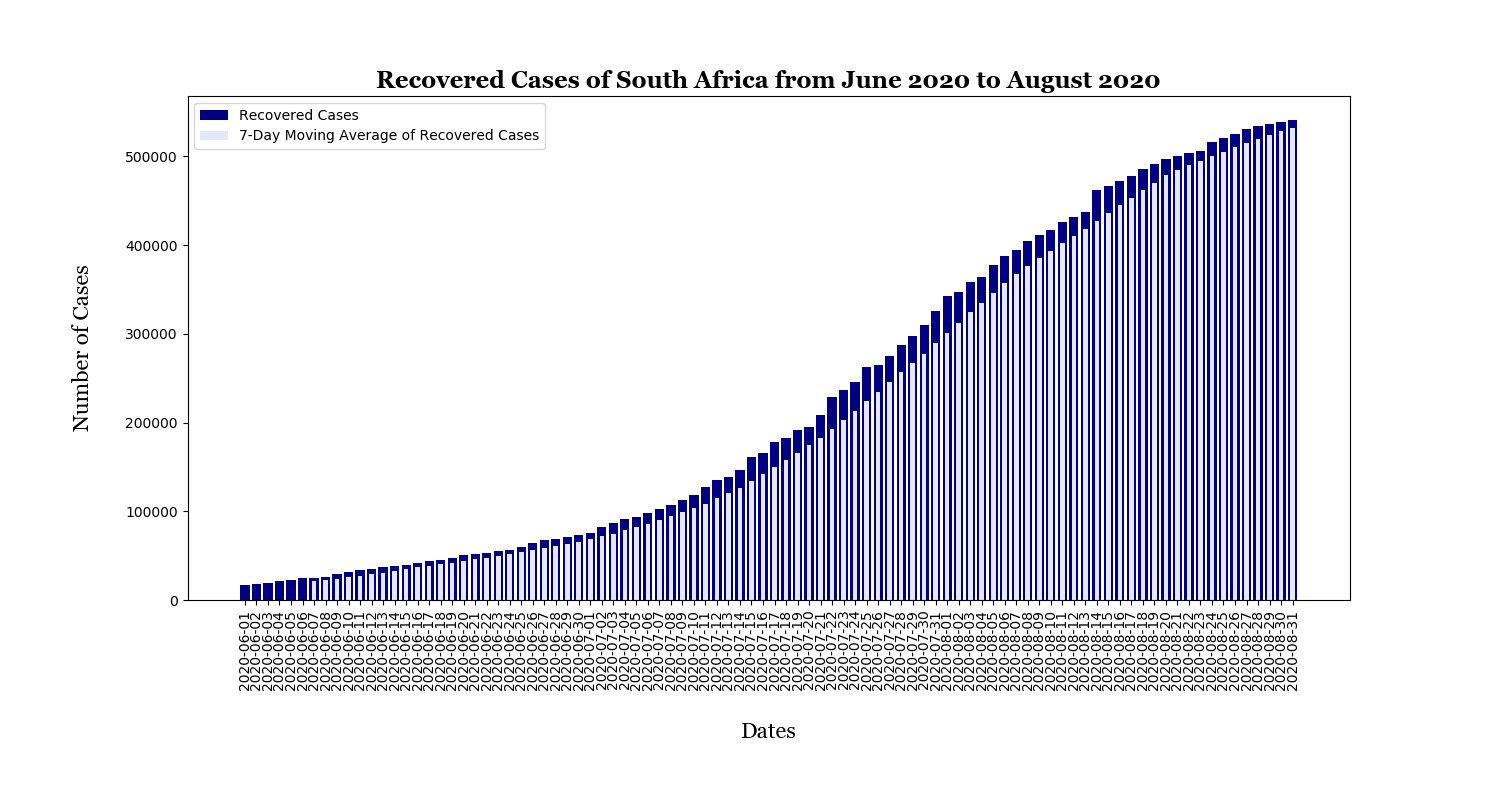

7

In [19]:
fig = plt.figure(figsize=(15,8))

plt.subplot(1,1,1)

for i in range(92):
    for item in plt.gca().xaxis.get_ticklabels():
        item.set_rotation(90)
        
    plt.bar(dates[i], sa_recovered.iloc[i], width = 0.80, color='navy')
    
for i in range(86):
    plt.bar(final_dates_7day[i], smas_recovered_s[i], width = 0.40, color='lavender')

plt.bar(dates[0], sa_recovered.iloc[0], width = 0.80, color='navy', label ='Recovered Cases')
plt.bar(final_dates_7day[0], smas_recovered_s[0], width = 0.40, color='lavender', label = '7-Day Moving Average of Recovered Cases')
ax = plt.gca()
ax.set_xlabel('\nDates', fontdict={'fontname': 'Georgia'})
ax.set_ylabel('Number of Cases\n', fontdict={'fontname': 'Georgia'})
ax.set_title("Recovered Cases of South Africa from June 2020 to August 2020", fontdict={'fontname': 'Georgia', 'fontsize': 17, 'fontweight': 'bold'})
plt.legend()
plt.subplots_adjust(bottom=0.25)
plt.show()

def onclick(event):  
    plt.cla()
    for i in range(92):
        for item in plt.gca().xaxis.get_ticklabels():
            item.set_rotation(90)
        
        plt.bar(dates[i], sa_recovered.iloc[i], width = 0.80, color='navy')
    
    for i in range(86):
        plt.bar(final_dates_7day[i], smas_recovered_s[i], width = 0.40, color='lavender')

    plt.bar(dates[0], sa_recovered.iloc[0], width = 0.80, color='navy', label ='Recovered Cases')
    plt.bar(final_dates_7day[0], smas_recovered_s[0], width = 0.40, color='lavender', label = '7-Day Moving Average of Recovered Cases')
    ax = plt.gca()
    ax.set_xlabel('\nDates', fontdict={'fontname': 'Georgia'})
    ax.set_ylabel('Number of Cases\n', fontdict={'fontname': 'Georgia'})
    ax.set_title("Recovered Cases of South Africa from June 2020 to August 2020", fontdict={'fontname': 'Georgia', 'fontsize': 17, 'fontweight': 'bold'})
    plt.legend()
    plt.subplots_adjust(bottom=0.25)
    plt.show()
    
    if event.xdata >= -5 and event.xdata <= 10 and event.ydata >= 539000:
        plt.gca().set_title('Recovered Cases\nLowest Value: {}\nHighest Value: {}'.format(sa_recovered.min(), sa_recovered.max()), fontdict={'fontname': 'Georgia', 'fontsize': 12})
    
    if event.xdata >= -5 and event.xdata <= 10 and event.ydata < 539000 and event.ydata >= 514000:
        plt.gca().set_title('7-Day Moving Average\nLowest Value: {:.2f}\nHighest Value: {:.2f}'.format(smas_recovered_s.min(), smas_recovered_s.max()), fontdict={'fontname': 'Georgia', 'fontsize': 12})

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

### Plotting the death cases of South Africa with 7-Day Moving Average

<IPython.core.display.Javascript object>


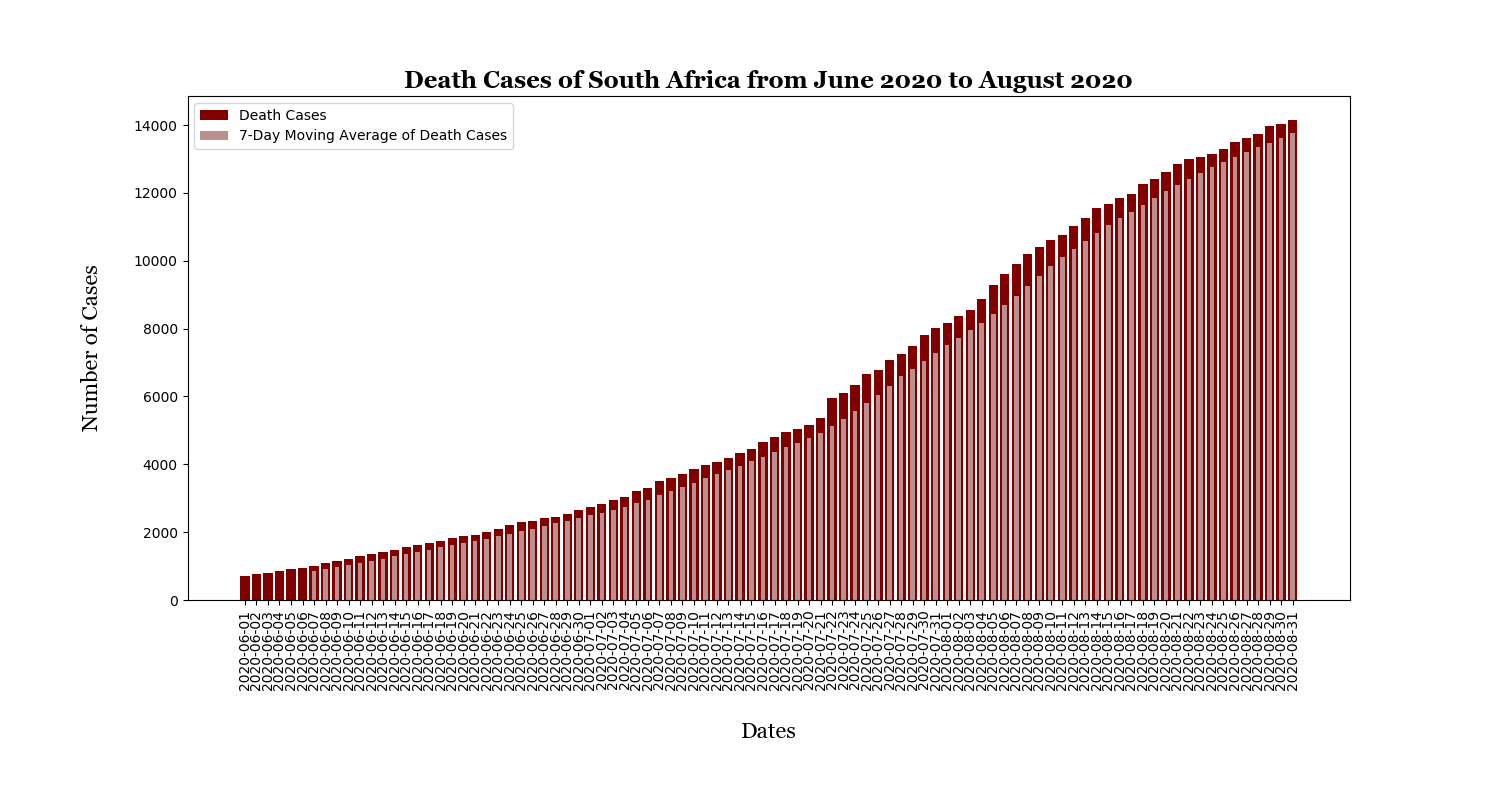

7

In [20]:
fig = plt.figure(figsize=(15,8))

plt.subplot(1,1,1)

for i in range(92):
    for item in plt.gca().xaxis.get_ticklabels():
        item.set_rotation(90)
        
    plt.bar(dates[i], sa_death.iloc[i], width = 0.80, color='maroon')
    
for i in range(86):
    plt.bar(final_dates_7day[i], smas_death_s[i], width = 0.40, color='rosybrown')

plt.bar(dates[0], sa_death.iloc[0], width = 0.80, color='maroon', label ='Death Cases')
plt.bar(final_dates_7day[0], smas_death_s[0], width = 0.40, color='rosybrown', label = '7-Day Moving Average of Death Cases')
ax = plt.gca()
ax.set_xlabel('\nDates', fontdict={'fontname': 'Georgia'})
ax.set_ylabel('Number of Cases\n', fontdict={'fontname': 'Georgia'})
ax.set_title("Death Cases of South Africa from June 2020 to August 2020", fontdict={'fontname': 'Georgia', 'fontsize': 17, 'fontweight': 'bold'})
plt.legend()
plt.subplots_adjust(bottom=0.25)
plt.show()

def onclick(event):  
    plt.cla()
    for i in range(92):
        for item in plt.gca().xaxis.get_ticklabels():
            item.set_rotation(90)
        
        plt.bar(dates[i], sa_death.iloc[i], width = 0.80, color='maroon')
    
    for i in range(86):
        plt.bar(final_dates_7day[i], smas_death_s[i], width = 0.40, color='rosybrown')
    
    plt.bar(dates[0], sa_death.iloc[0], width = 0.80, color='maroon', label ='Death Cases')
    plt.bar(final_dates_7day[0], smas_death_s[0], width = 0.40, color='rosybrown', label = '7-Day Moving Average of Death Cases')
    ax = plt.gca()
    ax.set_xlabel('\nDates', fontdict={'fontname': 'Georgia'})
    ax.set_ylabel('Number of Cases\n', fontdict={'fontname': 'Georgia'})
    ax.set_title("Death Cases of Peru from June 2020 to August 2020", fontdict={'fontname': 'Georgia', 'fontsize': 17, 'fontweight': 'bold'})
    plt.legend()
    plt.subplots_adjust(bottom=0.25)
    plt.show()
    
    if event.xdata >= -5 and event.xdata <= 10 and event.ydata >= 14000:
        plt.gca().set_title('Death Cases\nLowest Value: {}\nHighest Value: {}'.format(sa_death.min(), sa_death.max()), fontdict={'fontname': 'Georgia', 'fontsize': 12})
    
    if event.xdata >= -5 and event.xdata <= 10 and event.ydata < 14000 and event.ydata >= 13000:
        plt.gca().set_title('7-Day Moving Average\nLowest Value: {:.2f}\nHighest Value: {:.2f}'.format(smas_death_s.min(), smas_death_s.max()), fontdict={'fontname': 'Georgia', 'fontsize': 12})

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

### Plotting the active cases of South Africa with 7-Day Moving Average

<IPython.core.display.Javascript object>


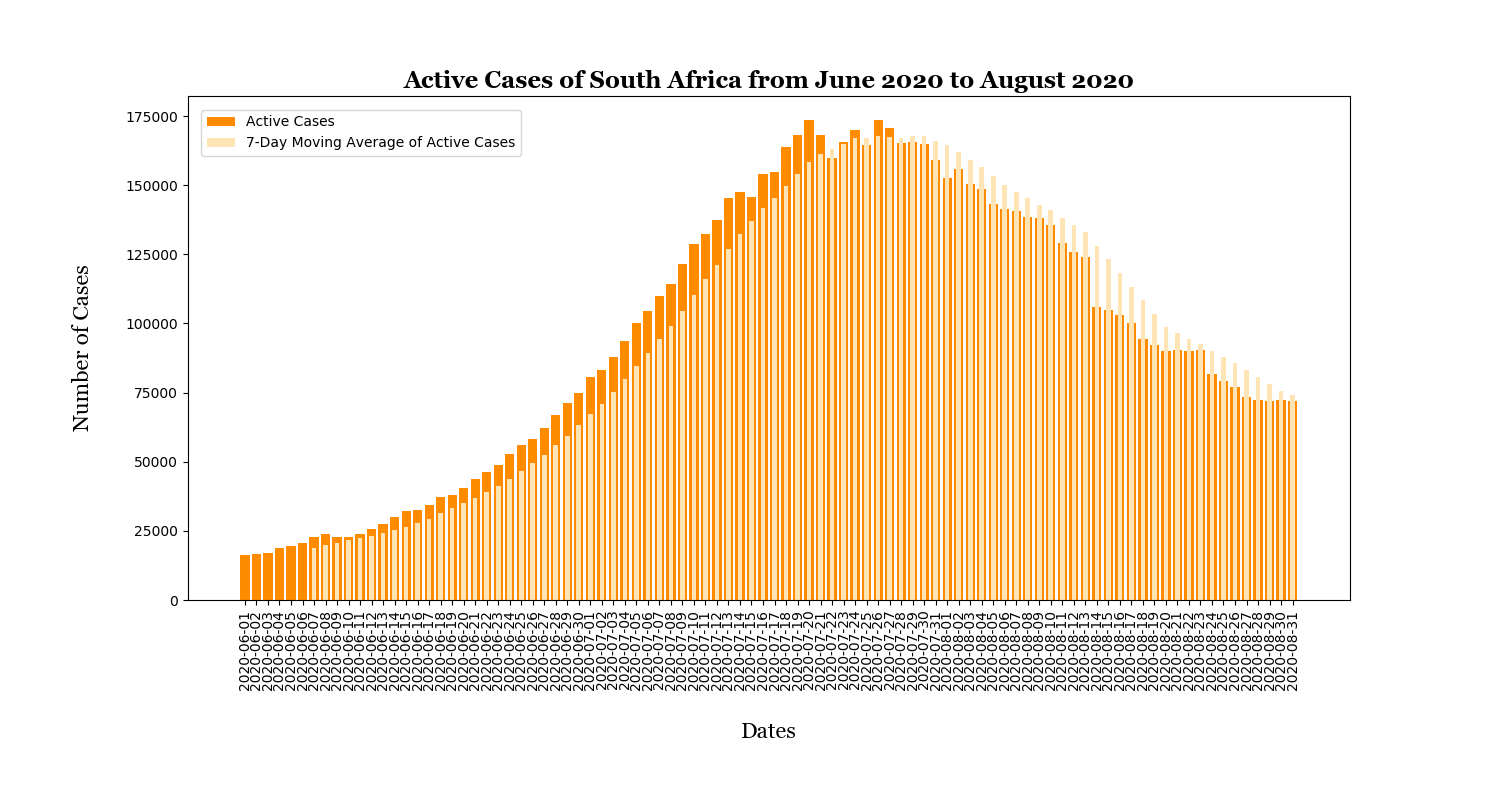

7

In [21]:
fig = plt.figure(figsize=(15,8))

plt.subplot(1,1,1)

for i in range(92):
    for item in plt.gca().xaxis.get_ticklabels():
        item.set_rotation(90)
        
    plt.bar(dates[i], sa_active[i], width = 0.80, color='darkorange')
    
for i in range(86):
    plt.bar(final_dates_7day[i], smas_active_s[i], width = 0.40, color='moccasin')

plt.bar(dates[0], sa_active[0], width = 0.80, color='darkorange', label ='Active Cases')
plt.bar(final_dates_7day[0], smas_active_s[0], width = 0.40, color='moccasin', label = '7-Day Moving Average of Active Cases')
ax = plt.gca()
ax.set_xlabel('\nDates', fontdict={'fontname': 'Georgia'})
ax.set_ylabel('Number of Cases\n', fontdict={'fontname': 'Georgia'})
ax.set_title("Active Cases of South Africa from June 2020 to August 2020", fontdict={'fontname': 'Georgia', 'fontsize': 17, 'fontweight': 'bold'})
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=1)
plt.subplots_adjust(bottom=0.25)
plt.show()


def onclick(event):  
    plt.cla()
    for i in range(92):
        for item in plt.gca().xaxis.get_ticklabels():
            item.set_rotation(90)
        
        plt.bar(dates[i], sa_active[i], width = 0.80, color='darkorange')
    
    for i in range(86):
        plt.bar(final_dates_7day[i], smas_active_s[i], width = 0.40, color='moccasin')

    plt.bar(dates[0], sa_active[0], width = 0.80, color='darkorange', label ='Active Cases')
    plt.bar(final_dates_7day[0], smas_active_s[0], width = 0.40, color='moccasin', label = '7-Day Moving Average of Active Cases')
    ax = plt.gca()
    ax.set_xlabel('\nDates', fontdict={'fontname': 'Georgia'})
    ax.set_ylabel('Number of Cases\n', fontdict={'fontname': 'Georgia'})
    ax.set_title("Active Cases of South Africa from June 2020 to August 2020", fontdict={'fontname': 'Georgia', 'fontsize': 17, 'fontweight': 'bold'})
    plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=1)
    plt.subplots_adjust(bottom=0.25)
    plt.show()
    
    if event.xdata >= -5 and event.xdata <= 15 and event.ydata >= 171000:
        plt.gca().set_title('Active Cases\nLowest Value: {}\nHighest Value: {}'.format(min(sa_active), max(sa_active)), fontdict={'fontname': 'Georgia', 'fontsize': 12})
    
    if event.xdata >= -5 and event.xdata <= 15 and event.ydata < 171000 and event.ydata >= 163000:
        plt.gca().set_title('7-Day Moving Average\nLowest Value: {:.2f}\nHighest Value: {:.2f}'.format(min(smas_active_s), max(smas_active_s)), fontdict={'fontname': 'Georgia', 'fontsize': 12})

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

***